In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('/Users/apple/Desktop/python side project/Machine learning/Bike Sharing/train.csv')
df_test = pd.read_csv('/Users/apple/Desktop/python side project/Machine learning/Bike Sharing/test.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Introduction

### Features

> datetime - hourly date + timestamp  
> season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
> holiday - whether the day is considered a holiday  
> workingday - whether the day is neither a weekend nor holiday  
> weather -  
>  。1: Clear, Few clouds, Partly cloudy, Partly cloudy  
>  。2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
>  。3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
>  。4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
> temp - temperature in Celsius  
> atemp - "feels like" temperature in Celsius  
> humidity - relative humidity  
> windspeed - wind speed  
> casual - number of non-registered user rentals initiated  
> registered - number of registered user rentals initiated  
> count - number of total rentals  

### Target

<div style="border-left: 5px solid green; padding: 10px; background-color: #d4edda; color: #155724;">
    <b>Predict the total count of bikes rented during each hour</b> 
</div>

# EDA

### Find null values in the data

> There's no null values in train data

In [92]:
df_na=df.isna().sum()
df_na

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

> There's no null values in test data

In [93]:
df_test_na=df_test.isna().sum()
df_test_na

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

### Count amount for each Year,Month

> 1. The trend indicates strong seasonal variations, with rentals peaking in summer and fall(Apr. - Sep.) and dropping in winter and spring(Oct. - Mar). A sharp increase is observed from early 2011 to mid-2011, followed by fluctuations. The highest rentals occur in mid-2012 before declining towards the year's end.  
> 2. This pattern suggests a strong correlation between bike rentals and weather conditions, with higher demand in warmer months and lower demand in colder months, aligning with seasonal changes.

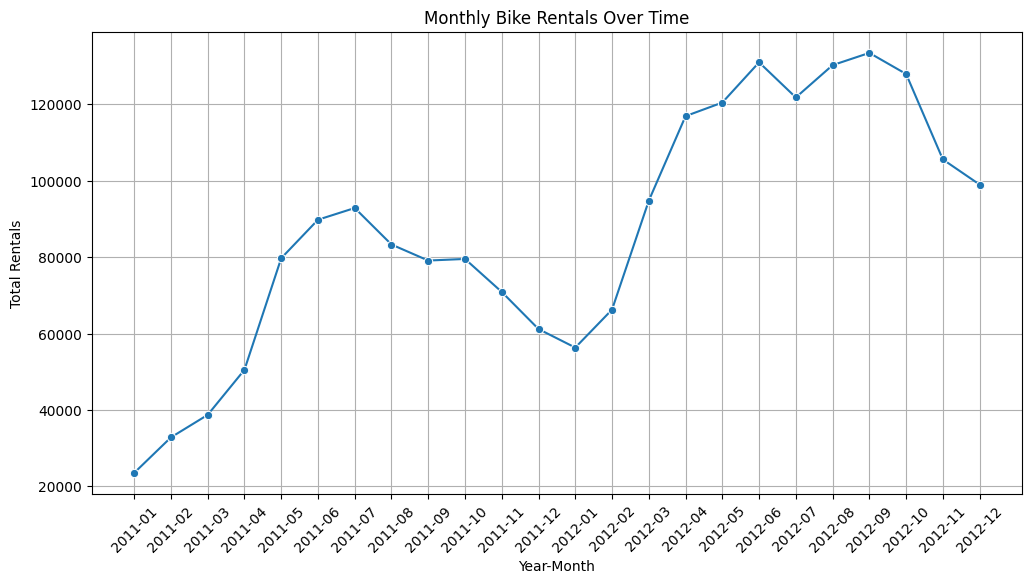

In [94]:
df["datetime"] = pd.to_datetime(df["datetime"])
df_test["datetime"] = pd.to_datetime(df_test["datetime"])

# Extract year and month
df["year"] = df["datetime"].dt.year
df_test["year"] = df_test["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df_test["month"] = df_test["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df_test["day"] = df_test["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df_test["hour"] = df_test["datetime"].dt.hour

# Group by year and month, summing the count
monthly_counts = df.groupby(["year", "month"])["count"].sum().reset_index()

# Create a new column for easier plotting
monthly_counts["year_month"] = monthly_counts["year"].astype(str) + "-" + monthly_counts["month"].astype(str).str.zfill(2)

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x="year_month", y="count", marker="o")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Total Rentals")
plt.title("Monthly Bike Rentals Over Time")
plt.grid(True)

# Show the plot
plt.show()

### Count amount for each season

> 1. Summer and Fall generally have higher median rentals compared to Spring and Winter.  
> 2. Spring has the lowest rental counts, with a lower median and fewer extreme values.  
> 3. Fall exhibits the highest median rental count, suggesting peak demand.  
> 4. Outliers are visible across all seasons, indicating occasional spikes in rentals.

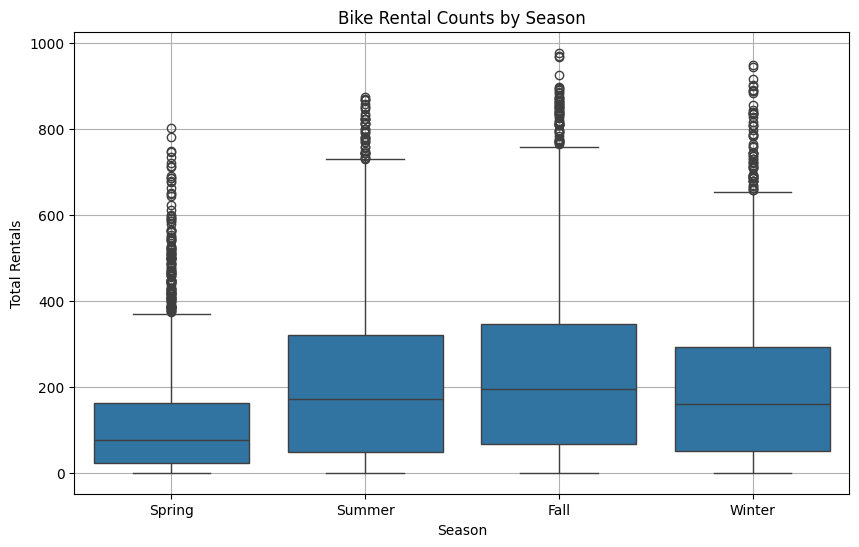

In [95]:
# Define season labels
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_n'] = df['season'].map(season_labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='season_n', y='count', data=df, order=['Spring', 'Summer', 'Fall', 'Winter'])

# Formatting
plt.title('Bike Rental Counts by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.grid(True)

# Show plot
plt.show()

### Average Count amount for different temperature, humidity, windspeed

> 1. Higher temperatures generally have higher rentals compared to colder temperatures.
> 2. Lower humidity generally have higher rentals compared to higher humidity. We see a drop in count where humidity<17, this might be due to data imbalance or specific commuter behaviors.
> 3. There isn't any strong linear relationships between rental count and windspeed, we will drop this column later.

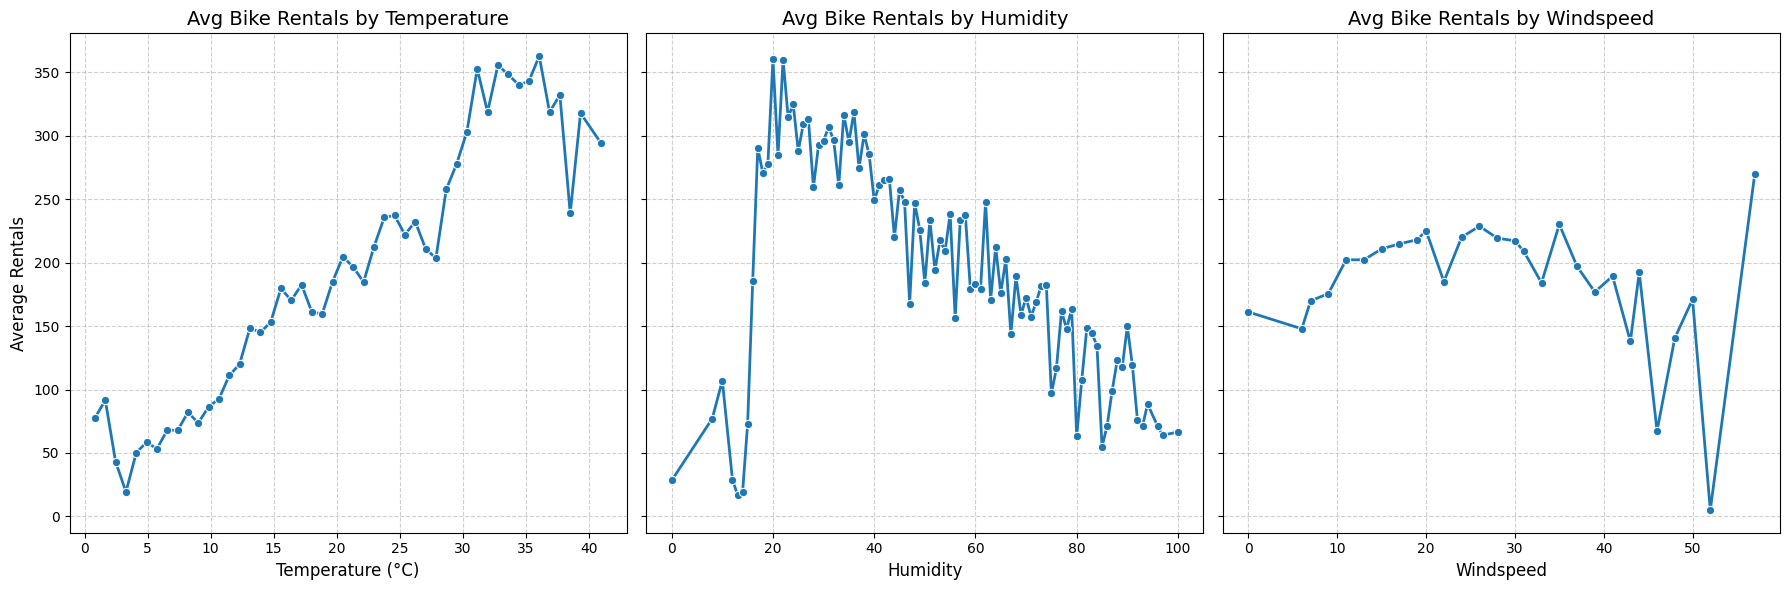

In [96]:
# Calculate the mean count of rentals per temperature, humidity, windspeed value
temperature_counts = df.groupby('temp')["count"].mean().reset_index()
humidity_counts = df.groupby('humidity')["count"].mean().reset_index()
windspeed_counts = df.groupby('windspeed')["count"].mean().reset_index()

# Create a figure with 3 subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot Average Rentals by Temperature
sns.lineplot(ax=axes[0], data=temperature_counts, x="temp", y="count", marker="o", linewidth=2)
axes[0].set_title('Avg Bike Rentals by Temperature', fontsize=14)
axes[0].set_xlabel('Temperature (°C)', fontsize=12)
axes[0].set_ylabel('Average Rentals', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Average Rentals by Humidity
sns.lineplot(ax=axes[1], data=humidity_counts, x="humidity", y="count", marker="o", linewidth=2)
axes[1].set_title('Avg Bike Rentals by Humidity', fontsize=14)
axes[1].set_xlabel('Humidity', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Plot Average Rentals by Windspeed
sns.lineplot(ax=axes[2], data=windspeed_counts, x="windspeed", y="count", marker="o", linewidth=2)
axes[2].set_title('Avg Bike Rentals by Windspeed', fontsize=14)
axes[2].set_xlabel('Windspeed', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show plots
plt.show()

### Average Count amount for holiday, workingday, weather condition

> 1. Bike rentals are fairly similar on holiday and non-holidays.  
> 2. Bike rentals are fairly similar on working and non-working days.  
> 3. Rentals are highest on clear or partly cloudy days. But suprisingly, rentals are slightly higher in heavy rain/snow than in light precipitation—this might be due to data imbalance or specific commuter behaviors.

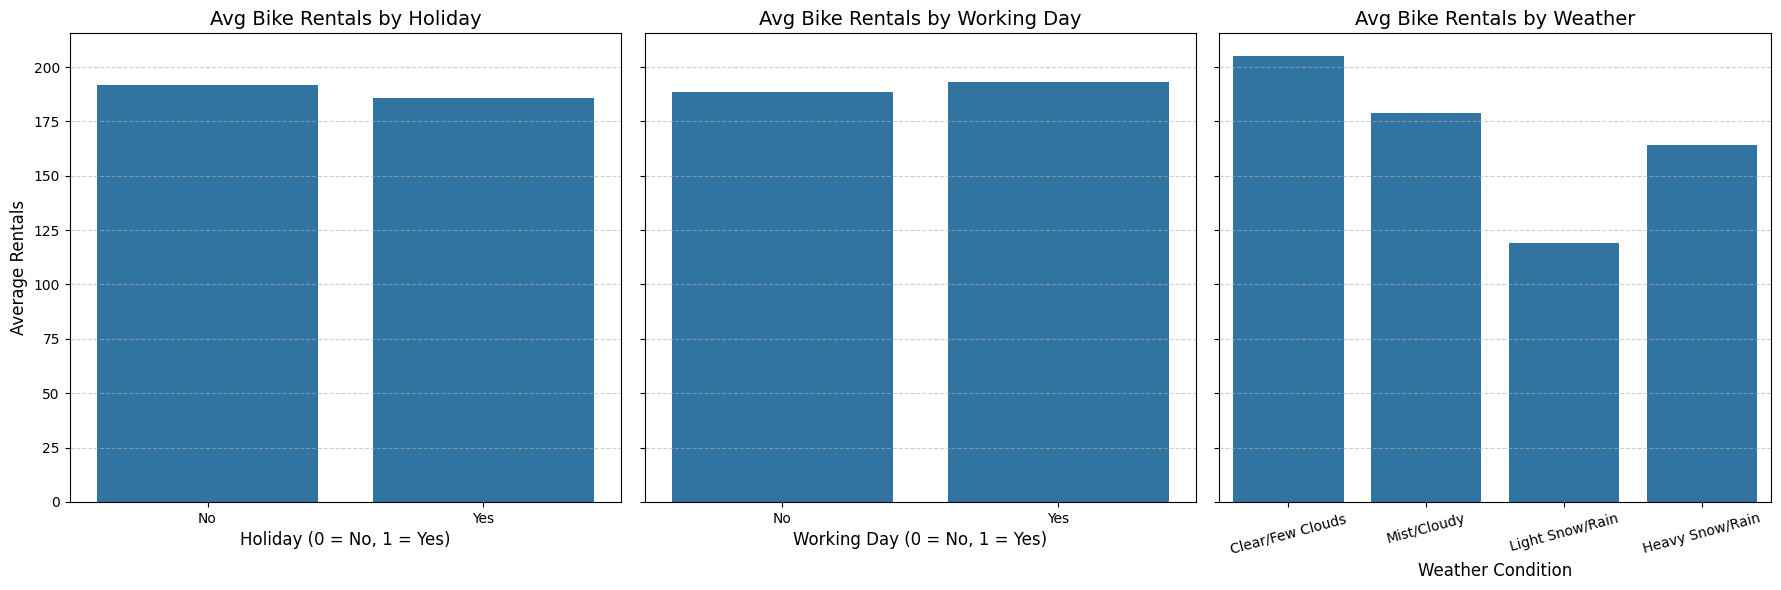

In [98]:
# Create a figure with 3 subplots in a single row for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot Average Rentals by Holiday
sns.barplot(ax=axes[0], x="holiday", y="count", data=df, estimator=np.mean, ci=None)
axes[0].set_title('Avg Bike Rentals by Holiday', fontsize=14)
axes[0].set_xlabel('Holiday (0 = No, 1 = Yes)', fontsize=12)
axes[0].set_ylabel('Average Rentals', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No", "Yes"])
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot Average Rentals by Working Day
sns.barplot(ax=axes[1], x="workingday", y="count", data=df, estimator=np.mean, ci=None)
axes[1].set_title('Avg Bike Rentals by Working Day', fontsize=14)
axes[1].set_xlabel('Working Day (0 = No, 1 = Yes)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No", "Yes"])
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Plot Average Rentals by Weather Condition
weather_labels = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Snow/Rain'
}
df['weather_label'] = df['weather'].map(weather_labels)

sns.barplot(ax=axes[2], x="weather_label", y="count", data=df, estimator=np.mean, ci=None)
axes[2].set_title('Avg Bike Rentals by Weather', fontsize=14)
axes[2].set_xlabel('Weather Condition', fontsize=12)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=15)
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show plots
plt.show()


### Average rentals each hour(workingday) vs. Average rentals each hour(non-workingday)

> 1. Working Days:  
>   。Morning peak (around 8 AM) likely corresponds to commuting hours.  
>   。Evening peak (around 5-7 PM) suggests return commutes from work.  
> 2. Non-Working Days:  
>   。Rentals peak later in the morning, around 10 AM - 6 PM.  
>   。Evening rentals gradually decline, with no sharp peak as seen on working days.


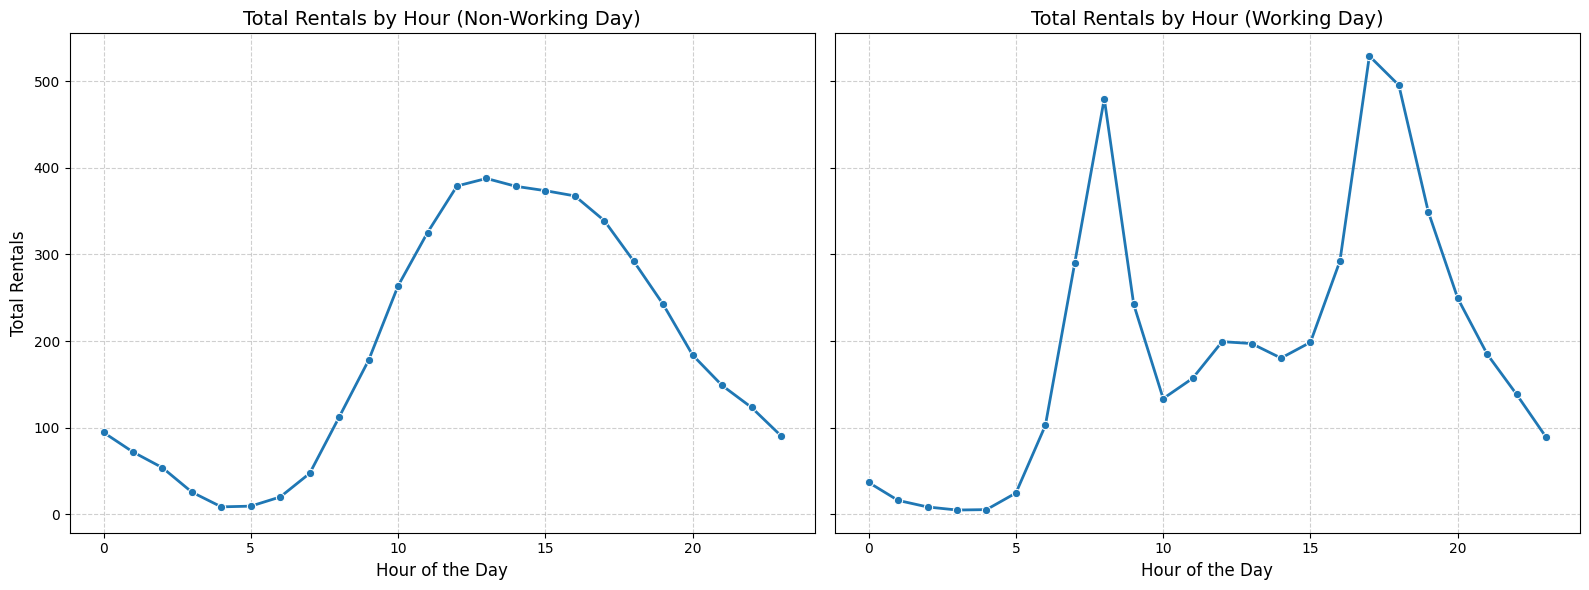

In [99]:
# Group by working day and hour, summing the count of rentals
hourly_rentals = df.groupby(['workingday', 'hour'])['count'].mean().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for workingday = 0 (Non-working day)
sns.lineplot(ax=axes[0], data=hourly_rentals[hourly_rentals['workingday'] == 0], x='hour', y='count', marker="o", linewidth=2)
axes[0].set_title('Total Rentals by Hour (Non-Working Day)', fontsize=14)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Total Rentals', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot for workingday = 1 (Working day)
sns.lineplot(ax=axes[1], data=hourly_rentals[hourly_rentals['workingday'] == 1], x='hour', y='count', marker="o", linewidth=2)
axes[1].set_title('Total Rentals by Hour (Working Day)', fontsize=14)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show plots
plt.show()

### Average rentals each hour(holiday) vs. Average rentals each hour(non-holiday)

> 1. Holiday:  
>   。Unlike workdays, there is no sharp morning peak, indicating a more relaxed schedule.  
>   。Rentals continue to rise steadily, peaking between 5-6 PM, suggesting increased afternoon leisure activities.
> 2. Non-holiday:  
>   。Morning peak (around 8 AM) likely corresponds to commuting hours.  
>   。Evening peak (around 5-6 PM) suggests return commutes from work.  

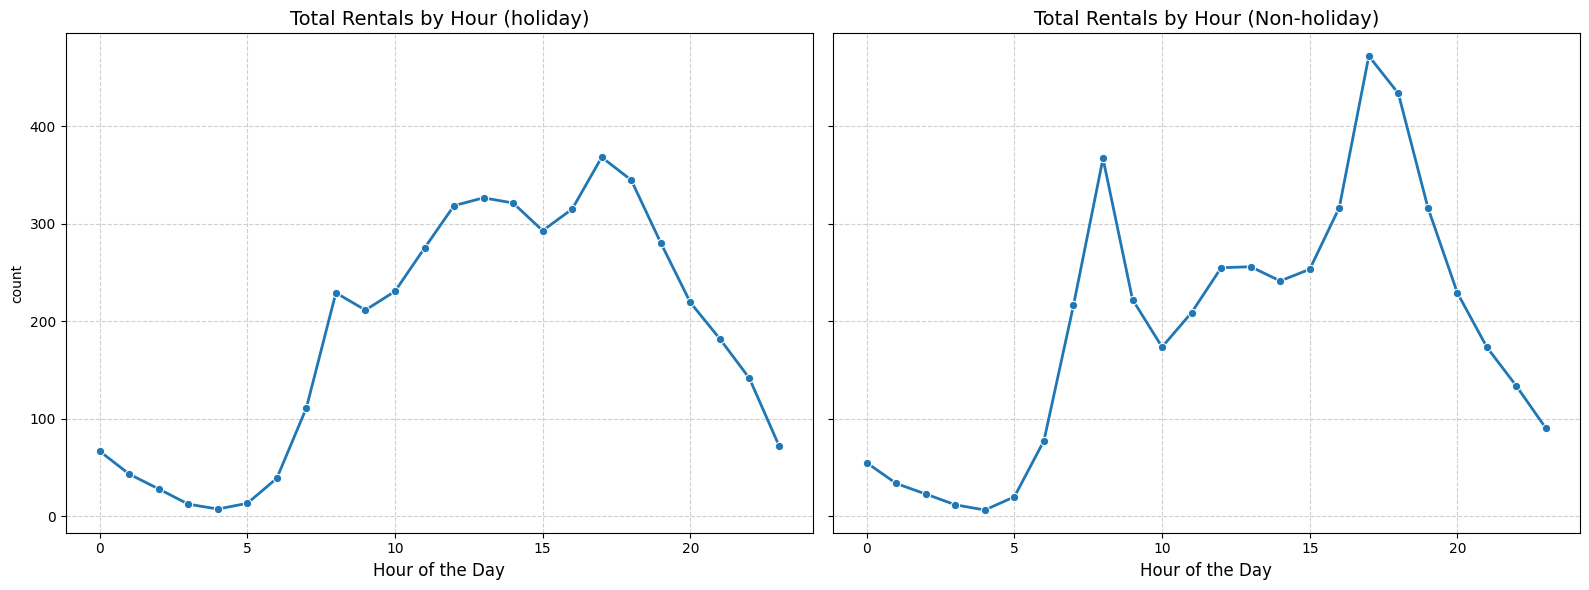

In [100]:
# Group by working day and hour, summing the count of rentals
holiday_hourly_rentals = df.groupby(['holiday', 'hour'])['count'].mean().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for holiday = 1 (holiday)
sns.lineplot(ax=axes[0], data=holiday_hourly_rentals[holiday_hourly_rentals['holiday'] == 1], x='hour', y='count', marker="o", linewidth=2)
axes[0].set_title('Total Rentals by Hour (holiday)', fontsize=14)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot for holiday = 0 (Non-holiday day)
sns.lineplot(ax=axes[1], data=holiday_hourly_rentals[holiday_hourly_rentals['holiday'] == 0], x='hour', y='count', marker="o", linewidth=2)
axes[1].set_title('Total Rentals by Hour (Non-holiday)', fontsize=14)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Total Rentals', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show plots
plt.show()

### temp and atemp relationship

> We see that temp and atemp is highly correlated, so we will drop one column(atemp) later

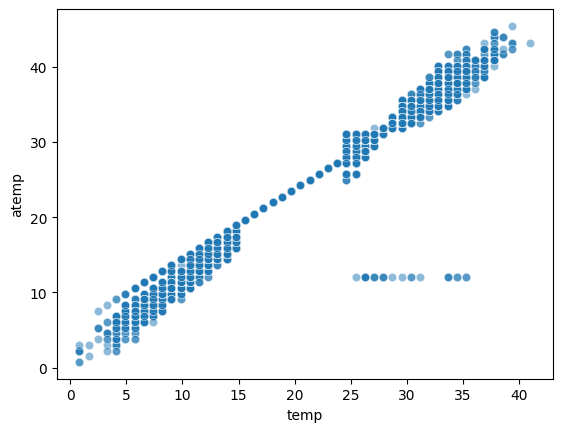

In [101]:
sns.scatterplot(x=df['temp'], y=df['atemp'], alpha=0.5)
plt.show()

### Distribution in count

> We see that there's several outliers in count and this might affect the models accuracy, so we'll drop the outliers later. Also, we see that count is highly skewed, so we'll do a log transform for count

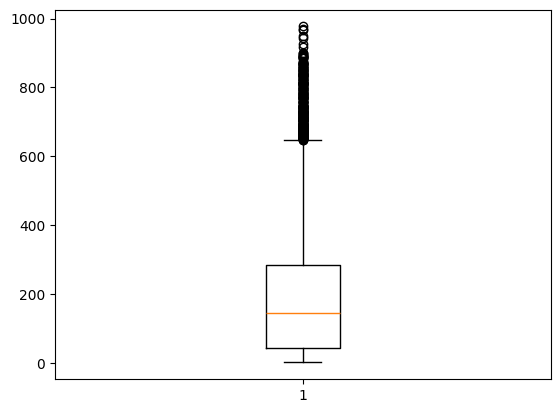

In [102]:
plt.boxplot(df['count'])
plt.show()

In [103]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,season_n,weather_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Spring,Clear/Few Clouds
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Spring,Clear/Few Clouds
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Spring,Clear/Few Clouds
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Spring,Clear/Few Clouds
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Spring,Clear/Few Clouds


# Feature Engineering

### Drop outliers for count

In [111]:
df_fe = df.copy()

# Calculate Q1, Q3, and IQR for 'count'
Q1 = df_fe['count'].quantile(0.25)
Q3 = df_fe['count'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset (keeping only non-outlier values)
df_fe = df_fe[(df_fe['count'] >= lower_bound) & (df_fe['count'] <= upper_bound)]

### Log transform for count

In [112]:
df_fe['count'] = np.log1p(df_fe['count'])

### Group temperature and humidity into bins

> This is cancelled since it won't improve model accuracy

In [113]:
# Define temperature bins and labels
# bins = [0, 10, 20, 30, df_fe['temp'].max()]
# labels = ['0', '1', '2', '3']

# Create a new column for temperature groups
# df_fe['temp_group'] = pd.cut(df_fe['temp'], bins=bins, labels=labels, include_lowest=True)
# df_test['temp_group'] = pd.cut(df_test['temp'], bins=bins, labels=labels, include_lowest=True)

# Define humidity bins and labels
# bins = [0, 40, 80, 100]
# labels = ['0', '1', '2']

# Create a new categorical feature
# df_fe['humidity_group'] = pd.cut(df_fe['humidity'], bins=bins, labels=labels, include_lowest=True)
# df_test['humidity_group'] = pd.cut(df_test['humidity'], bins=bins, labels=labels, include_lowest=True)


### Label encode for ordinal categorical features

> This is cancelled since it won't improve model accuracy

In [114]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# df_fe[['temp_group', 'humidity_group']] = encoder.fit_transform(df_fe[['temp_group', 'humidity_group']])
# df_test[['temp_group', 'humidity_group']] = encoder.transform(df_test[['temp_group', 'humidity_group']])



In [115]:
df_fe.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,season_n,weather_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,Spring,Clear/Few Clouds
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,Spring,Clear/Few Clouds
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,Spring,Clear/Few Clouds
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,Spring,Clear/Few Clouds
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,Spring,Clear/Few Clouds


### Drop unnecessary columns

> 1. We have datetime devided into year, month, day, hour column  
> 2. season_n and weather_label are columns that we created to better show the plot  
> 3. casual and registered are datas that we won't have when predicting in real time data  
> 4. We drop atemp to prevent multicollinearity since it is highlt related with temp  
> 5. We drop windspeed since it isn't highly related with count

In [116]:

df_fe_drop = df_fe.drop(['datetime','season_n','weather_label','casual','registered','atemp','windspeed'], axis=1)
df_test_drop = df_test.drop(['datetime','atemp','windspeed'], axis=1)
df_fe_drop.head()

,season,holiday,workingday,weather,temp,humidity,count,year,month,day,hour
0,1,0,0,1,9.84,81,2.833213,2011,1,1,0
1,1,0,0,1,9.02,80,3.713572,2011,1,1,1
2,1,0,0,1,9.02,80,3.496508,2011,1,1,2
3,1,0,0,1,9.84,75,2.639057,2011,1,1,3
4,1,0,0,1,9.84,75,0.693147,2011,1,1,4


# Build model

In [128]:
# Define independent and dependent variable
X_fe = df_fe_drop.drop(columns=['count']) 
y_fe = df_fe_drop['count']

# Split the data into train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

# Standardize for numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['temp', 'humidity']] = scaler.fit_transform(X_train[['temp', 'humidity']])
X_test[['temp', 'humidity']] = scaler.transform(X_test[['temp', 'humidity']])
df_test_drop[['temp', 'humidity']] = scaler.transform(df_test_drop[['temp', 'humidity']])


### Linear Regressor

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Train on log-transformed y

# Predict on test set (predictions will be in log scale)
y_pred = linear_model.predict(X_test)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSLE: {rmsle}")

RMSLE: 0.9967040555314624


### Lasso Regression

In [119]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Lasso Regression
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]  # Regularization strength
}

# Initialize Lasso model
lasso = Lasso(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
lasso_search = RandomizedSearchCV(
    estimator=lasso, 
    param_distributions=param_grid, 
    n_iter=30,  # Number of random hyperparameter samples
    scoring='neg_mean_squared_error',  # Using MSE as the scoring metric
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

# Train the model using RandomizedSearchCV
lasso_search.fit(X_train, y_train)

# Get the best model
lasso_best = lasso_search.best_estimator_

# Predict on test set (predictions will be in log scale)
y_pred = lasso_best.predict(X_test)

# Compute RMSLE (Root Mean Squared Logarithmic Error)
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))

# Print best parameters and RMSLE
print(f"Best Lasso Parameters: {lasso_search.best_params_}")
print(f"RMSLE: {rmsle}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Lasso Parameters: {'alpha': 0.001}
RMSLE: 0.9965432797034434


### Ridge regression

In [120]:
from sklearn.linear_model import Ridge

# Define the hyperparameter grid for Ridge Regression
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]  # Regularization strength
}

# Initialize Lasso model
ridge = Ridge(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
ridge_search = RandomizedSearchCV(
    estimator=ridge, 
    param_distributions=param_grid, 
    n_iter=10,  # Number of random hyperparameter samples
    scoring='neg_mean_squared_error',  # Using MSE as the scoring metric
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

# Train the model using RandomizedSearchCV
ridge_search.fit(X_train, y_train)

# Get the best model
ridge_best = ridge_search.best_estimator_

# Predict on test set (predictions will be in log scale)
y_pred = ridge_best.predict(X_test)

# Compute RMSLE (Root Mean Squared Logarithmic Error)
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))

# Print best parameters and RMSLE
print(f"Best Ridge Parameters: {ridge_search.best_params_}")
print(f"RMSLE: {rmsle}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Ridge Parameters: {'alpha': 50}
RMSLE: 0.9965554905226046


### Decision Tree

In [121]:
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider for best split
}

# Initialize Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
decision_tree_search = RandomizedSearchCV(
    estimator=dt, 
    param_distributions=param_grid, 
    n_iter=30,  # Number of random hyperparameter samples
    scoring='neg_mean_squared_error',  # Using MSE as the scoring metric
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

# Train the model using RandomizedSearchCV
decision_tree_search.fit(X_train, y_train)

# Get the best model
decision_tree_best = decision_tree_search.best_estimator_

# Predict on test set (predictions will be in log scale)
y_pred = decision_tree_best.predict(X_test)

# Compute RMSLE (Root Mean Squared Logarithmic Error)
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))

# Print best parameters and RMSLE
print(f"Best Decision Tree Parameters: {decision_tree_search.best_params_}")
print(f"RMSLE: {rmsle}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Decision Tree Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}
RMSLE: 0.39225368031148633


### Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500, 1000],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV with 5-fold cross-validation
random_forest_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=30,  # Number of random hyperparameter samples
    scoring='neg_mean_squared_error',  # Using MSE as the scoring metric
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

# Train the model using RandomizedSearchCV
random_forest_search.fit(X_train, y_train)

# Get the best model
random_forest_beast = random_forest_search.best_estimator_

# Predict on test set (predictions will be in log scale)
y_pred = random_forest_beast.predict(X_test)

# Compute RMSLE (Root Mean Squared Logarithmic Error)
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))

# Print best parameters and RMSLE
print(f"Best Random Forest Parameters: {random_forest_search.best_params_}")
print(f"RMSLE: {rmsle}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
RMSLE: 0.3715521246948497


### XGBoost Regressor

In [125]:
from xgboost import XGBRegressor

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 300, 500, 1000],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.3],  # Step size shrinkage
    'max_depth': [3, 6, 10],  # Maximum depth of a tree
    'subsample': [0.7, 1],  # Fraction of samples used per boosting round
    'colsample_bytree': [0.7, 1]  # Fraction of features used per tree
}

# Initialize XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV with 5-fold cross-validation
XGB_search = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_grid, 
    n_iter=30,  # Number of random hyperparameter samples
    scoring='neg_mean_squared_error',  # Using MSE as the scoring metric
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

# Train the model using RandomizedSearchCV
XGB_search.fit(X_train, y_train)

# Get the best model
XGB_best = XGB_search.best_estimator_

# Predict on test set (predictions will be in log scale)
y_pred = XGB_best.predict(X_test)

# Compute RMSLE (Root Mean Squared Logarithmic Error)
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))

# Print best parameters and RMSLE
print(f"Best XGBoost Parameters: {XGB_search.best_params_}")
print(f"RMSLE: {rmsle}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1}
RMSLE: 0.29310328791686135


### MLP

In [56]:
from sklearn.neural_network import MLPRegressor

# Define the hyperparameter grid for MLP (Multi-layer Perceptron) Regressor
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (25,10), (25,)],  # Different layer configurations
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization strength
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'learning_rate': ['constant', 'adaptive']  # Learning rate schedules
}

# Initialize MLP model
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
MLP_search = RandomizedSearchCV(
    estimator=mlp, 
    param_distributions=param_grid, 
    n_iter=30,  # Number of random hyperparameter samples
    scoring='neg_mean_squared_error',  # Using MSE as the scoring metric
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

# Train the model using RandomizedSearchCV
MLP_search.fit(X_train, y_train)

# Get the best model
MLP_best = MLP_search.best_estimator_

# Predict on test set (predictions will be in log scale)
y_pred = MLP_best.predict(X_test)

# Compute RMSLE (Root Mean Squared Logarithmic Error)
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))

# Print best parameters and RMSLE
print(f"Best MLP Parameters: {MLP_search.best_params_}")
print(f"RMSLE: {rmsle}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best MLP Parameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 10), 'alpha': 0.1}
RMSLE: 1.210334640165621


### Voting Regressor

> Since XGBoost, Decision Tree, Random Forest has the best RMSLE, I'll use these to build a voting regressor

In [126]:
from sklearn.ensemble import VotingRegressor

# Define models with their best parameters
voting_regressor = VotingRegressor(
    estimators=[
        ('XGBoost', XGB_best),  # Best XGBoost model
        ('RandomForest', random_forest_beast),  # Best Random Forest model
        ('DecisionTree', decision_tree_best)  # Best Decision Tree model
    ],
    weights=[3, 1, 1],  # Assign higher weight to XGBoost
    n_jobs=-1
)

# Train Voting Regressor
voting_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = voting_regressor.predict(X_test)

# Compute RMSLE
rmsle_voting = np.sqrt(mean_squared_error(y_test, y_pred))

# Print result
print(f"RMSLE for Voting Regressor: {rmsle_voting}")

RMSLE for Voting Regressor: 0.29970061878438536


### Stacking Regressor

> Since XGBoost, Decision Tree, Random Forest has the best RMSLE, I'll use these to build a stacking regressor

In [127]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('XGBoost', XGB_best),  # Best tuned XGBoost model
    ('DecisionTree', decision_tree_best),  # Best tuned Decision Tree model
    ('RandomForest', random_forest_beast),  # Best tuned Random Forest model
]

# Define meta-learner (stacking final estimator)
meta_learner = LinearRegression()  # Linear model to combine base predictions

# Create Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models, 
    final_estimator=meta_learner, 
    n_jobs=-1  # Use all available processors
)

# Train Stacking Regressor
stacking_regressor.fit(X_train, y_train)

# Predict on test set (predictions will be in log scale)
y_pred = stacking_regressor.predict(X_test)

# Compute RMSLE (Root Mean Squared Logarithmic Error)
rmsle_stacking = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"RMSLE for Stacking Regressor: {rmsle_stacking}")

RMSLE for Stacking Regressor: 0.2929203287151882


<div style="border-left: 5px solid green; padding: 10px; background-color: #d4edda; color: #155724;">
    <b>Result:</b> We will choose Stacking Regressor as our final model since it has the lowest RMSLE
</div>

<div style="border-left: 5px solid red; padding: 10px; background-color:rgb(237, 212, 212); color:rgb(87, 21, 21);">
    <b>Future applications：</b><br><br>
    1. Bike Redistribution<br>
    If we can add a station name feature, we can predict the bike demand for each station and redistribute bikes accordingly to prevent bike shortages.<br><br>
    2. Limited time offer<br>
    Based on predicted demand, discounted pricing can be offered during low-demand periods to attract more users. For example, rental discounts could be provided near bars during late-night weekend hours to increase user engagement.
</div>